In [1]:
import numpy as np
import pandas as pd
import scipy.sparse

In [2]:
#import datasets
df_train_stemmed_sampled = pd.read_csv('movie_review_train_stemmed_sampled.csv')
df_test_stemmed_sampled = pd.read_csv('movie_review_test_stemmed_sampled.csv')

In [3]:
X_train = scipy.sparse.load_npz('X_train_sampled_sparse_matrix.npz')
X_test = scipy.sparse.load_npz('X_test_sampled_sparse_matrix.npz')
y_train = df_train_stemmed_sampled['Label']
y_test = df_test_stemmed_sampled['Label']

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data = pca.fit_transform(X_test.toarray())

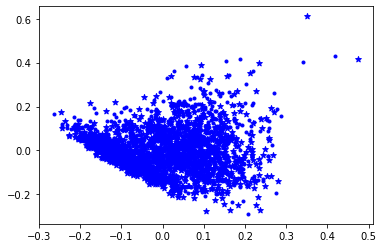

In [13]:
import matplotlib.pyplot as plt
# negative point, positive star - label
plt.scatter(data[0:1250:,0], data[0:1250:,1], marker = '.', color = 'blue')# negative
plt.scatter(data[1250:2500:,0], data[1250:2500:,1], marker = '*',  color = 'blue') # positve

In [6]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
data2 = svd.fit_transform(X_test) 

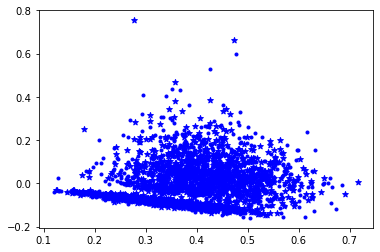

In [7]:
# negative point, positive star - label
plt.scatter(data2[0:1250:,0], data2[0:1250:,1], marker = '.', color = 'blue')# negative
plt.scatter(data2[1250:2500:,0], data2[1250:2500:,1], marker = '*',  color = 'blue') # positve

In [8]:
prediction_knn_sampled = np.load('prediction_knn_sampled.npy')

In [9]:
# marker: star marker means positive, point marker means negative - label
# color: blue means positive, red means negative - prediction
# red&star = false negative, point&blue = false positive
# red&point, blue&star = normal

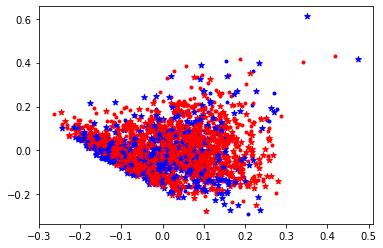

In [14]:
for i,j,k in zip(prediction_knn_sampled, data, range(0,2500,1)):
    # label negative
    if k <1250:
        # false positive
        if i == 1:
            plt.scatter(j[0], j[1], marker = '.', color = 'blue')
            
        elif i == 0:
            plt.scatter(j[0], j[1], marker = '.', color = 'red')  
    # label positive
    elif k>1249:
        if i == 1:
            plt.scatter(j[0], j[1], marker = '*', color = 'blue')
            
        # false negative
        elif i == 0:
            plt.scatter(j[0], j[1], marker = '*', color = 'red')

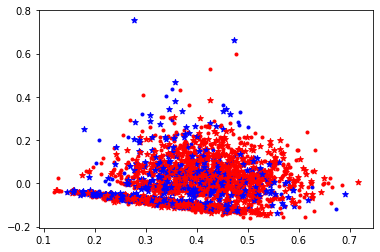

In [11]:
for i,j,k in zip(prediction_knn_sampled, data2, range(0,2500,1)):
    # label negative
    if k <1250:
        # false positive
        if i == 1:
            plt.scatter(j[0], j[1], marker = '.', color = 'blue')
            
        elif i == 0:
            plt.scatter(j[0], j[1], marker = '.', color = 'red')  
    # label positive
    elif k>1249:
        if i == 1:
            plt.scatter(j[0], j[1], marker = '*', color = 'blue')
            
        # false negative
        elif i == 0:
            plt.scatter(j[0], j[1], marker = '*', color = 'red')